This notebook demonstrates a simple linear regression analysis using [Python/R] to model Salary based on Years of Experience.

In [18]:
dataset <- read.csv("regression_data.csv")

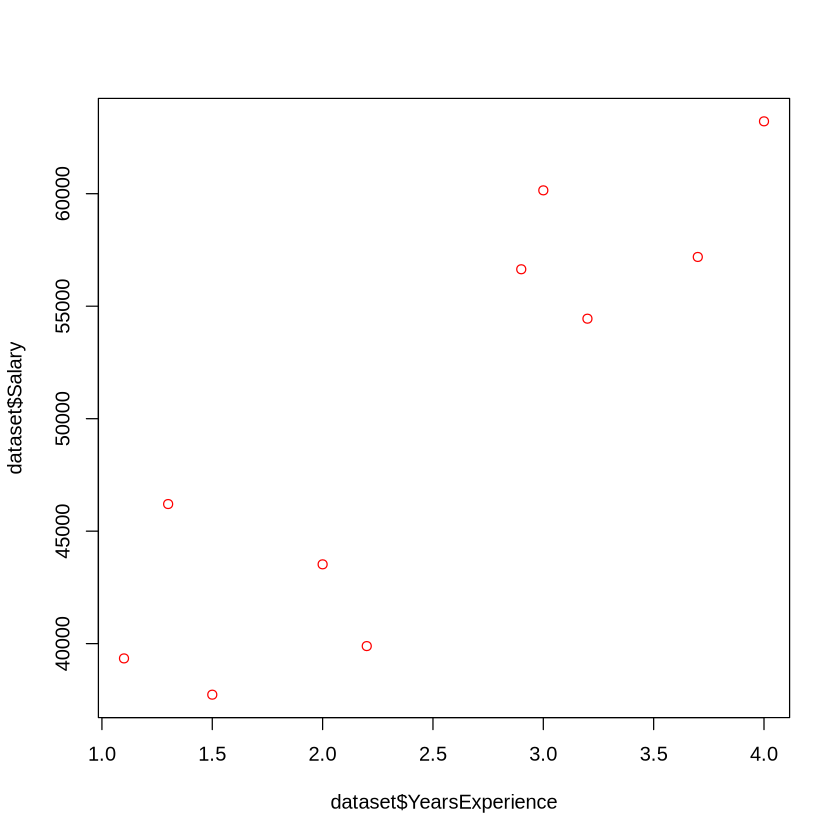

In [19]:
plot(dataset$YearsExperience, dataset$Salary, col="red")

In [20]:
model <- lm(Salary ~ YearsExperience, data=dataset)

slope and intercept of the fitted line correlation coefficient

In [23]:
x <- dataset$YearsExperience
y <- dataset$Salary
model <- lm(y ~ x)
slope <- coef(model)[2]
intercept <- coef(model)[1]
r <- cor(x, y)

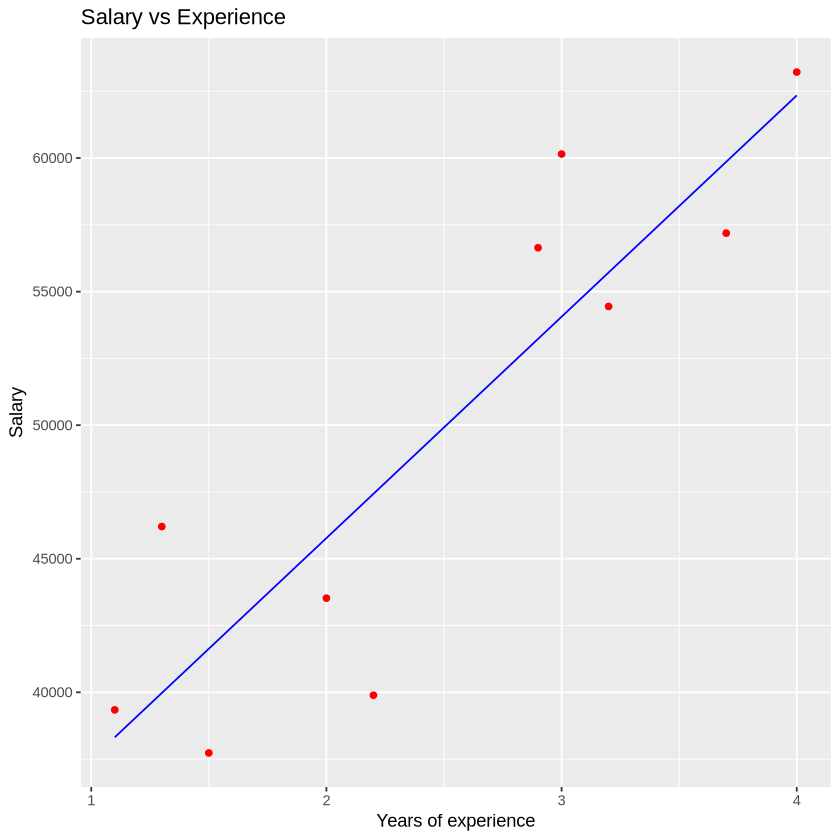

In [21]:
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$YearsExperience, y = dataset$Salary), colour = 'red') +
  geom_line(aes(x = dataset$YearsExperience, y = predict(model, newdata = dataset)), colour = 'blue') +
  ggtitle('Salary vs Experience') +
  xlab('Years of experience') +
  ylab('Salary')

In [22]:
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7540.2 -2564.9  -199.1  2814.8  6230.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        29204       4092   7.136 9.84e-05 ***
YearsExperience     8285       1532   5.407 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4680 on 8 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7583 
F-statistic: 29.24 on 1 and 8 DF,  p-value: 0.0006407


mse between observed and predicted values

In [24]:
mse <- mean((predict(model) - y)^2)


In [25]:
print("intercept")
print(intercept)
print ("slope")
print (slope)
print("r")
print(r)
print("mse")
print(mse)

[1] "intercept"
(Intercept) 
   29203.52 
[1] "slope"
       x 
8285.292 
[1] "r"
[1] 0.8860878
[1] "mse"
[1] 17523844


`geom_smooth()` using formula = 'y ~ x'


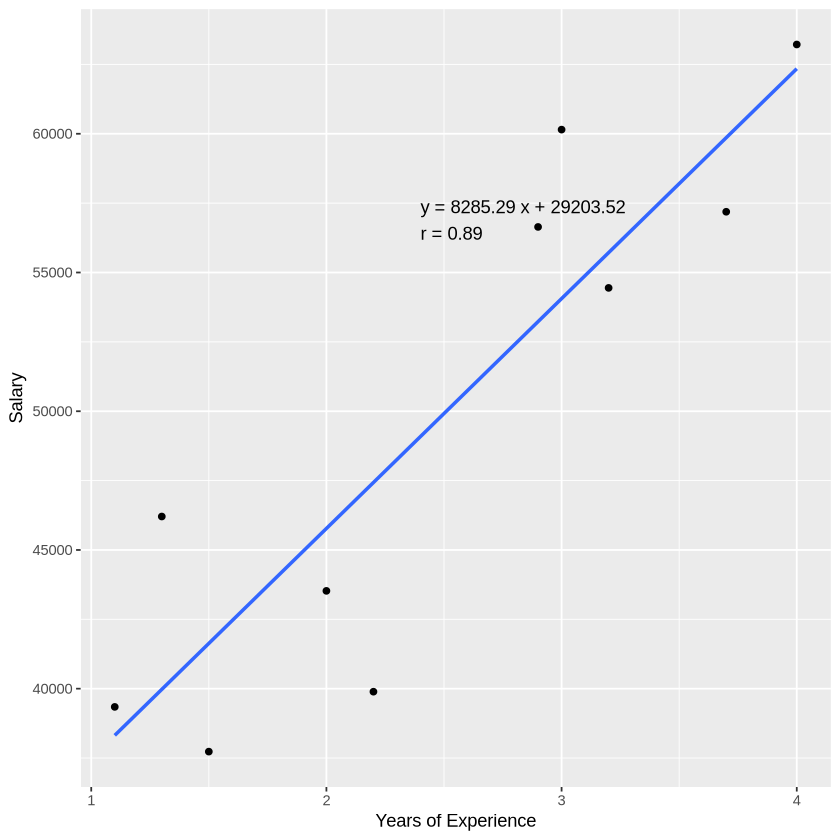

In [26]:
ggplot(dataset, aes(x = YearsExperience, y = Salary)) +
  geom_point() +
  geom_smooth(method = 'lm', se = FALSE) +
  annotate(
    "text",
    x = max(x) * 0.6,
    y = max(y) * 0.9,
    label = paste(
      "y =", round(slope, 2), "x +", round(intercept, 2),
      "\nr =", round(r, 2)
    ),
    hjust = 0
  ) +
  xlab("Years of Experience") +
  ylab("Salary")